In [15]:
import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from utils.registration import est_lin_transf, est_nl_transf, apply_lin_transf, apply_nl_transf
from utils.images import resample_img,normalize
from utils.masks import resample_mask
from skimage.transform import resize



In [25]:
def normalize_t(input):
    """
    This function applys normalization to make the data be in the range [-1,1].
    """
    input_data = sitk.GetArrayFromImage(input)
    min = np.min(input_data)
    max = np.max(input_data)
    input_data = (input_data - min) / (max - min) * 256.0
    return sitk.GetImageFromArray(input_data)

In [26]:
# Load data
img_40 = sitk.ReadImage('./data/common_40_image.nii.gz', sitk.sitkFloat32)
img_40 = normalize_t(img_40)
img_40 = sitk.GetArrayFromImage(resample_img(img_40, out_size= [512,512,256]))

In [27]:
# Generate training data
x_train = []
for idx in range(512):
    slice = img_40[:,:,idx]
    x_train.append(slice)

In [28]:
x_train

[array([[0.        , 0.06251527, 0.62515265, ..., 0.93772894, 1.4378511 ,
         1.9379731 ],
        [1.9013431 , 2.1514041 , 1.1399268 , ..., 2.5636141 , 2.2949939 ,
         1.6034188 ],
        [1.3470086 , 1.948718  , 1.4407815 , ..., 1.6986569 , 1.7172161 ,
         1.423199  ],
        ...,
        [1.209768  , 1.7201465 , 1.4989011 , ..., 1.4749695 , 1.9750917 ,
         1.7216117 ],
        [1.3313798 , 2.0268621 , 2.2261295 , ..., 0.9885226 , 1.4407815 ,
         1.4925519 ],
        [1.3201466 , 1.8017094 , 2.1768012 , ..., 1.2542125 , 2.1885226 ,
         1.5960928 ]], dtype=float32),
 array([[1.3128206 , 0.18754579, 0.        , ..., 1.0002443 , 2.2505496 ,
         2.7506716 ],
        [1.9272285 , 1.8647131 , 1.0261295 , ..., 3.265934  , 3.3875458 ,
         1.7216117 ],
        [1.0529915 , 1.0344323 , 1.0578755 , ..., 2.6432235 , 2.4       ,
         1.0608059 ],
        ...,
        [1.0256411 , 2.1001222 , 2.0884006 , ..., 0.72478634, 2.1186814 ,
         1.5697192 

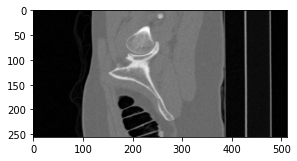

In [30]:
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(x_train[100], cmap = "Greys_r")